In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted


In [4]:
df = pd.read_csv("D:\project\SCFP2019.csv")
df.shape

(28885, 357)

In [5]:
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [7]:
# people who fear for being denied by credit
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (4623, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [108]:
# explore age
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


In [10]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (4623,)


5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

<Axes: xlabel='AGECL'>

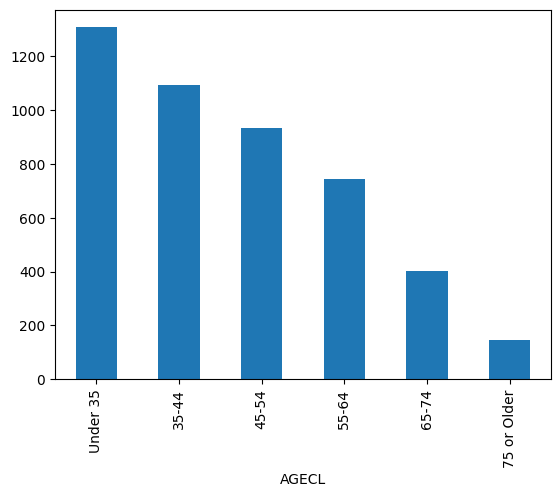

In [11]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind = "bar")

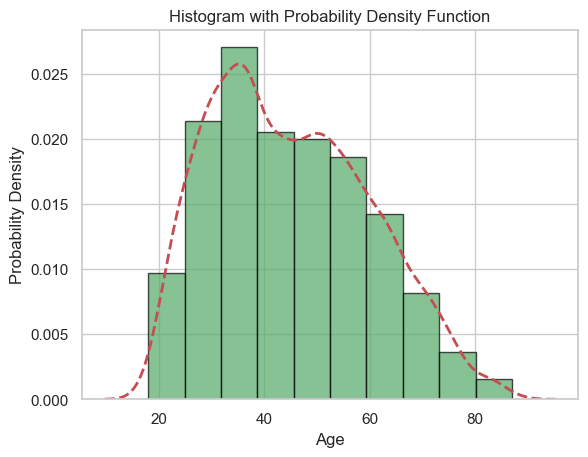

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for styling

# Assuming df_fear is your DataFrame
sns.set(style="whitegrid")  # Optional, for styling

# Plotting the histogram
plt.hist(df_fear["AGE"], bins=10, density=True, alpha=0.7, color='g', edgecolor='black')

# Adding a curve line (probability density function)
sns.kdeplot(df_fear["AGE"], color='r', linestyle='dashed', linewidth=2)

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.title("Histogram with Probability Density Function")

# Show the plot
plt.show()
    

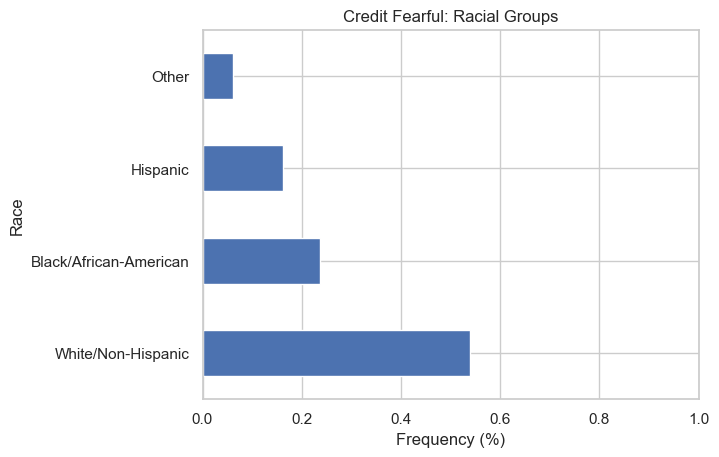

In [14]:
# explore race
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize =True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = "barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

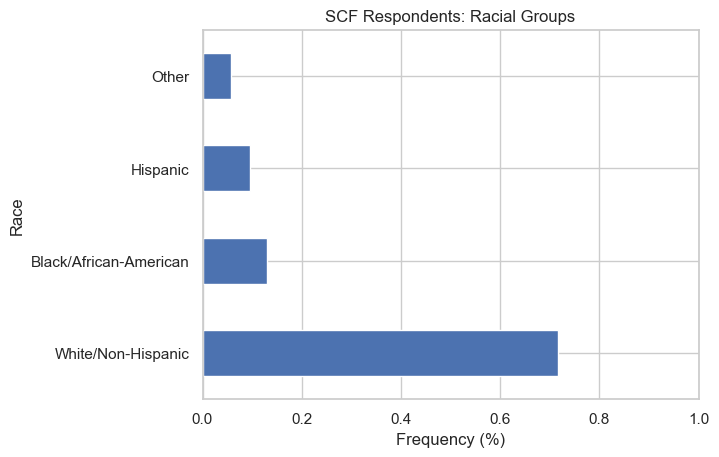

In [15]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = "barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

In [16]:
# explore income
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = df["INCCAT"].replace(inccat_dict).groupby(df["TURNFEAR"]).value_counts(normalize = True).rename("frequency").to_frame().reset_index()

print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


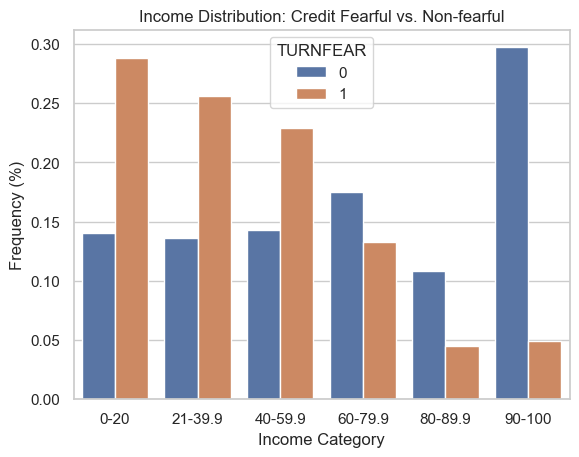

In [17]:
# Create bar chart of `df_inccat`
sns.barplot(x = df_inccat["INCCAT"],y = df_inccat["frequency"], hue = df_inccat["TURNFEAR"], order =inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

In [18]:
# relationship b/w asset and houses for whole data
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198061919267267


In [20]:
# relationship b/w asset and houses for credit fearful data
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735998714


In [23]:
df["EDUC"].groupby(df["TURNFEAR"]).value_counts(normalize = True).rename("frequency").to_frame().reset_index()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117
5,0,10,0.051150
6,0,11,0.046492
7,0,7,0.019578
8,0,4,0.012035
9,0,6,0.011953


In [24]:
df_educ =df["EDUC"].groupby(df["TURNFEAR"]).value_counts(normalize = True).rename("frequency").to_frame().reset_index()
print("df_educ type:", type(df_educ))
print("df_educ shape:", df_educ.shape)
df_educ.head()

df_educ type: <class 'pandas.core.frame.DataFrame'>
df_educ shape: (30, 3)


,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


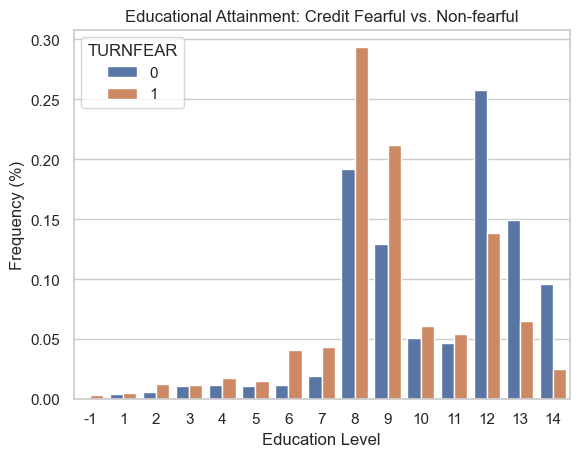

In [25]:
# Create bar chart of `df_educ`
sns.barplot(x = df_educ["EDUC"], y = df_educ["frequency"], hue = df_educ["TURNFEAR"])
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In [21]:

cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519806,0.622440,0.261261,0.116665
HOUSES,0.519806,1.000000,0.247852,0.266661,0.169300
INCOME,0.622440,0.247852,1.000000,0.114646,0.069400
DEBT,0.261261,0.266661,0.114646,1.000000,0.054179
EDUC,0.116665,0.169300,0.069400,0.054179,1.000000


In [22]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


<Axes: xlabel='DEBT', ylabel='ASSET'>

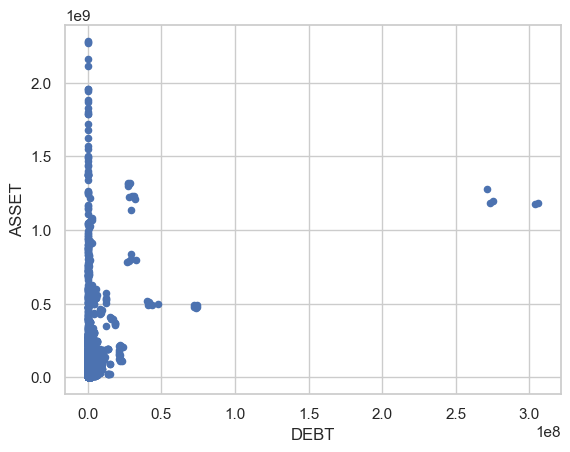

In [26]:
# Create scatter plot of ASSET vs DEBT, df
df.plot(kind = "scatter", x = "DEBT", y = "ASSET")

<Axes: xlabel='DEBT', ylabel='ASSET'>

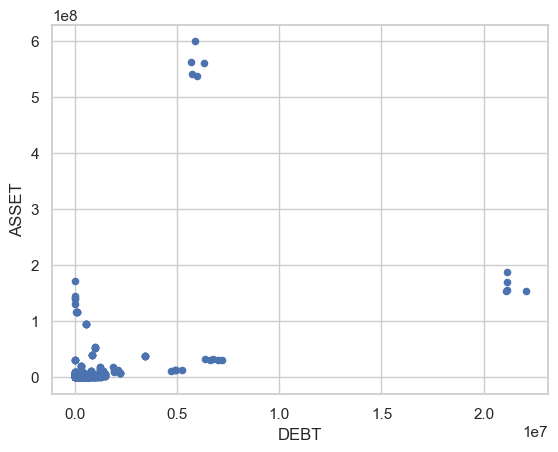

In [27]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot(kind = "scatter", x = "DEBT", y = "ASSET")

<Axes: xlabel='DEBT', ylabel='HOUSES'>

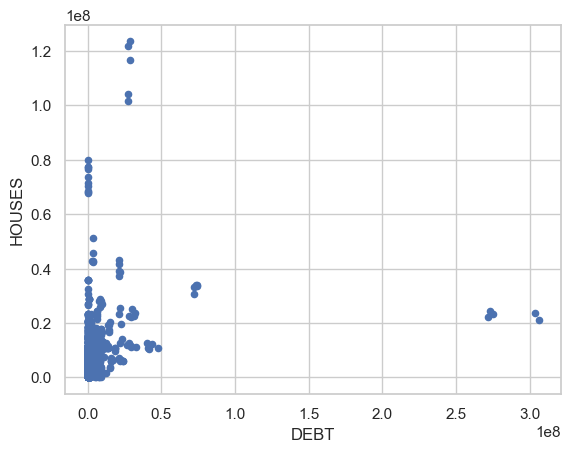

In [28]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot(kind = "scatter", x = "DEBT", y = "HOUSES")

<Axes: xlabel='DEBT', ylabel='HOUSES'>

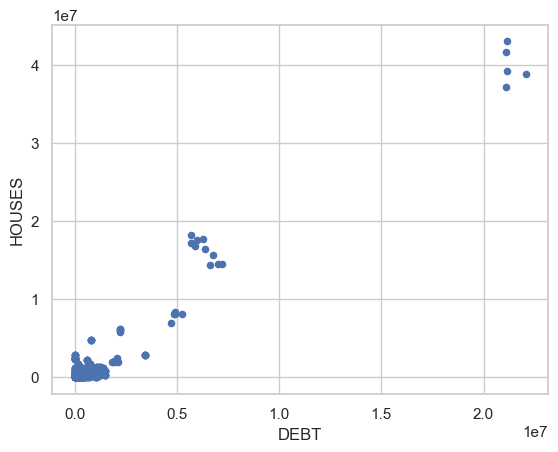

In [29]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot(kind = "scatter", x = "DEBT", y = "HOUSES")

In [120]:
X = df_fear[["DEBT","HOUSES"]]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (4623, 2)


,DEBT,HOUSES
5,14142.304636,0.0
6,14605.986755,0.0
7,17735.841060,0.0
8,16344.794702,0.0
9,17851.761589,0.0


In [121]:
# Build model
model = KMeans(n_clusters= 3, random_state=42, n_init = 10)
print("model type:", type(model))

# Fit model to data
model.fit(X)

# Assert that model has been fit to data
check_is_fitted(model)

model type: <class 'sklearn.cluster._kmeans.KMeans'>


In [122]:
labels = model.labels_
print("labels type:", type(labels))
print("labels shape:", labels.shape)
labels[:10]

labels type: <class 'numpy.ndarray'>
labels shape: (4623,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

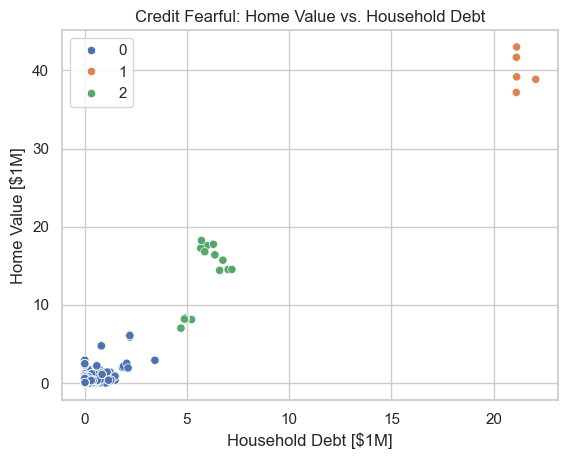

In [124]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(x=df_fear["DEBT"]/1e6, y = df_fear["HOUSES"]/1e6, hue = labels, palette ="deep")
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [125]:
centroids = model.cluster_centers_
print("centroids type:", type(centroids))
print("centroids shape:", centroids.shape)
centroids

centroids type: <class 'numpy.ndarray'>
centroids shape: (3, 2)


array([[  105508.05824359,   134642.03534344],
       [21310946.1192    , 39974035.4966    ],
       [ 5872302.19867333, 13524061.81013334]])

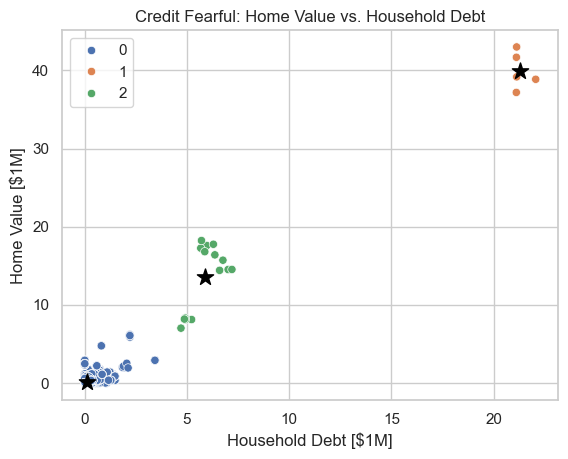

In [126]:
# Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(x=df_fear["DEBT"]/1e6, y = df_fear["HOUSES"]/1e6, hue = labels, palette ="deep")
plt.scatter(x=centroids[:,0]/1e6, y = centroids[:,1]/1e6, marker= "*", color = "black", s = 150)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [127]:
inertia = model.inertia_
print("inertia type:", type(inertia))
print("Inertia (3 clusters):", inertia)

inertia type: <class 'float'>
Inertia (3 clusters): 1262532206483915.5


In [128]:
ss = silhouette_score(X, model.labels_)
print("ss type:", type(ss))
print("Silhouette Score (3 clusters):", ss)

ss type: <class 'numpy.float64'>
Silhouette Score (3 clusters): 0.97688424629445


In [129]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for cluster in n_clusters:
    model = KMeans(n_clusters= cluster, random_state=42, n_init = 10)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))
    

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [4055509877242509.5, 1262532206483915.5, 733824099167177.5, 415641717152940.1, 316118825787996.44, 244813088696534.28, 202541727470617.75, 153620973481709.2, 135032767739602.8, 115868661836823.12, 98354755283421.55]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.9855099957519449, 0.97688424629445, 0.9490311483407262, 0.8396696236776875, 0.7526801280703003, 0.7277940458449282, 0.7256332651495845, 0.7335125606462771, 0.7313509140359435, 0.695036323283712, 0.6964839563525429]


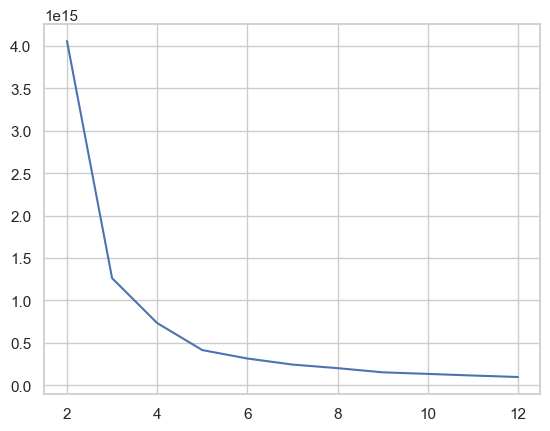

In [130]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters,inertia_errors)


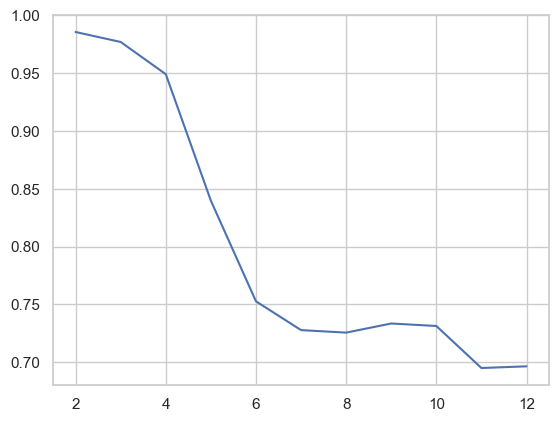

In [131]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)

In [132]:
# Build model
final_model = KMeans(n_clusters = 4, random_state= 42, n_init = 10)
print("final_model type:", type(final_model))

# Fit model to data
final_model.fit(X)

# Assert that model has been fit to data
check_is_fitted(final_model)

final_model type: <class 'sklearn.cluster._kmeans.KMeans'>


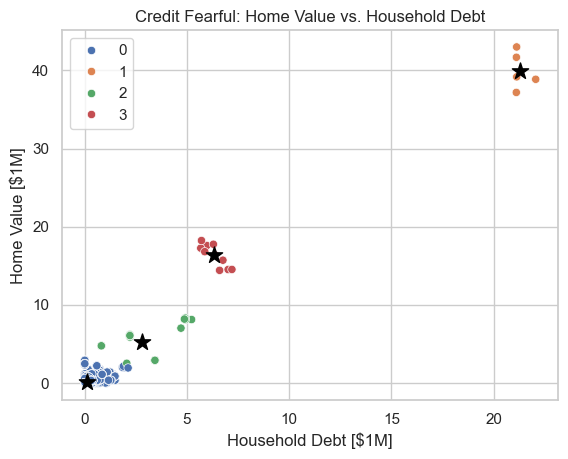

In [134]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(x=df_fear["DEBT"]/1e6, y = df_fear["HOUSES"]/1e6, hue = final_model.labels_, palette ="deep")
plt.scatter(x=final_model.cluster_centers_[:,0]/1e6, y = final_model.cluster_centers_[:,1]/1e6, marker= "*", color = "black", s = 150)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [135]:
xgb = X.groupby(final_model.labels_).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 2)


,DEBT,HOUSES
0,9.840064e+04,1.196152e+05
1,2.131095e+07,3.997404e+07
2,2.806353e+06,5.276040e+06
3,6.344099e+06,1.631466e+07


In [136]:
final_model.cluster_centers_

array([[   98400.63653316,   119615.17763498],
       [21310946.1192    , 39974035.4966    ],
       [ 2806353.22609762,  5276040.11353333],
       [ 6344098.75497   , 16314655.3642    ]])

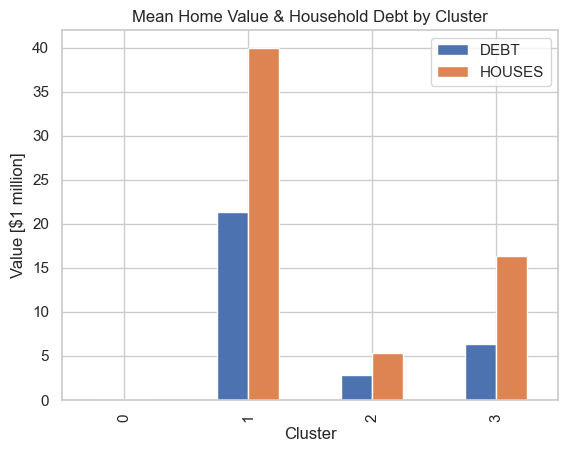

In [140]:
# Create side-by-side bar chart of `xgb`
(xgb/1e6).plot(kind= "bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");


In [141]:
# Calculate variance, get 10 largest features
top_ten_var = df_fear.var().sort_values().tail(10)

print("top_ten_var type:", type(top_ten_var))
print("top_ten_var shape:", top_ten_var.shape)
top_ten_var

top_ten_var type: <class 'pandas.core.series.Series'>
top_ten_var shape: (10,)


FIN          1.494847e+13
NONACTBUS    3.160902e+13
ACTBUS       1.566296e+14
KGBUS        2.526336e+14
KGTOTAL      2.770991e+14
BUS          3.090601e+14
NFIN         3.473237e+14
NETWORTH     4.103020e+14
NHNFIN       4.232423e+14
ASSET        4.254560e+14
dtype: float64

In [142]:
# Create horizontal bar chart of `top_ten_var`
fig = px.bar(top_ten_var)

fig.show()

In [145]:
# Create a boxplot of `NHNFIN`
fig = px.box(data_frame = df, x="NETWORTH")

fig.show()

In [146]:
# Calculate trimmed variance
top_ten_trim_var = df_fear.apply(trimmed_var).sort_values().tail(10)

print("top_ten_trim_var type:", type(top_ten_trim_var))
print("top_ten_trim_var shape:", top_ten_trim_var.shape)
top_ten_trim_var

top_ten_trim_var type: <class 'pandas.core.series.Series'>
top_ten_trim_var shape: (10,)


KGTOTAL     8.966038e+08
HOMEEQ      1.641215e+09
NH_MORT     2.528354e+09
MRTHEL      2.682876e+09
PLOAN1      2.796469e+09
DEBT        5.403150e+09
NETWORTH    9.098545e+09
HOUSES      9.750620e+09
NFIN        1.793278e+10
ASSET       2.713840e+10
dtype: float64

In [147]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(top_ten_trim_var)

fig.show()

In [148]:
high_var_cols = top_ten_trim_var.tail().index.to_list()

print("high_var_cols type:", type(high_var_cols))
print("high_var_cols len:", len(top_ten_trim_var))
high_var_cols

high_var_cols type: <class 'list'>
high_var_cols len: 10


['DEBT', 'NETWORTH', 'HOUSES', 'NFIN', 'ASSET']

In [149]:
X = df_fear[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (4623, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,14142.304636,-7778.267550,0.0,4520.900662,6364.037086
6,14605.986755,-5459.856954,0.0,7302.993377,9146.129801
7,17735.841060,-9406.950993,0.0,6491.549669,8328.890066
8,16344.794702,-2909.605298,0.0,11592.052980,13435.189404
9,17851.761589,-6624.858278,0.0,9389.562914,11226.903311


In [150]:
X_summary = X.aggregate(["mean", "std"]).astype(int)

print("X_summary type:", type(X_summary))
print("X_summary shape:", X_summary.shape)
X_summary

X_summary type: <class 'pandas.core.frame.DataFrame'>
X_summary shape: (2, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,147153,1644290,221174,1435980,1791444
std,807179,20255912,1582896,18636623,20626583


In [151]:
a =(X["ASSET"]-X["ASSET"].mean())/X["ASSET"].std()
print(a.head())
print("mean", a.mean())
print("std",a.std())

5   -0.086543
6   -0.086408
7   -0.086447
8   -0.086200
9   -0.086307
Name: ASSET, dtype: float64
mean 9.221839529657367e-18
std 1.0


In [152]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns = X.columns)

print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (4623, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.164803,-0.081569,-0.139743,-0.076817,-0.086552
1,-0.164229,-0.081454,-0.139743,-0.076668,-0.086417
2,-0.160351,-0.081649,-0.139743,-0.076712,-0.086457
3,-0.162075,-0.081328,-0.139743,-0.076438,-0.086209
4,-0.160207,-0.081512,-0.139743,-0.076556,-0.086316


In [153]:
X_scaled_summary = X_scaled.aggregate(["mean", "std"]) 

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary

X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,-1.536973e-17,1.229579e-17,-1.229579e-17,0.000000,1.229579e-17
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108,1.000108e+00


In [154]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for i in n_clusters:
    model = make_pipeline(
            StandardScaler(),
            KMeans(n_clusters=i,n_init=10,random_state=42)
    )
    
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(X, model.named_steps["kmeans"].labels_))
    

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [7789.322200510335, 3498.194354890185, 1926.0552997230377, 1070.126743701016, 738.4374584832243, 577.1345427877455, 487.935468874984, 409.6577326712491, 343.26147248817443, 295.0755979806935, 251.07508382414287]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.9926495190563747, 0.9859234178309937, 0.9752632913467988, 0.9530646375479923, 0.908277404864935, 0.7131726150745081, 0.8278033178772031, 0.5865801760939904, 0.5795594254882263, 0.5704307519268614, 0.5750782110041143]


In [155]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(x = n_clusters, y= inertia_errors)

fig.show()

In [156]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(x= n_clusters, y= silhouette_scores)

fig.show()

In [157]:
# Build model
final_model = make_pipeline(StandardScaler(), KMeans(n_clusters=4,n_init=10,random_state= 42))

# Fit model to data
final_model.fit(X)

# Assert that model has been fit to data
check_is_fitted(final_model)

In [164]:
labels = final_model.named_steps["kmeans"].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))


labels type: <class 'numpy.ndarray'>
labels len: 4623


In [165]:
final_model.named_steps["kmeans"].inertia_

1926.0552997230377

In [166]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,2.365677e+06,6.046217e+07,4.442075e+06,4.729228e+07,6.282785e+07
1,2.131095e+07,1.431371e+08,3.997404e+07,1.591535e+08,1.644480e+08
2,5.902210e+06,5.546250e+08,1.752023e+07,5.171695e+08,5.605272e+08
3,9.831620e+04,3.704919e+05,1.218749e+05,2.985424e+05,4.688081e+05


In [173]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(xgb, barmode= "group", log_y = True)
fig.update_xaxes(title_text='Cluster')
fig.show()

In [174]:
pca = make_pipeline(StandardScaler(),PCA(n_components=2, random_state=42))

X_t = pca.fit_transform(X)
X_pca = pd.DataFrame(X_t, columns=["PCA1", "PCA2"])
X_pca.head()

,PCA1,PCA2
0,-0.237291,-0.100152
1,-0.236884,-0.099916
2,-0.235556,-0.097367
3,-0.235803,-0.098731
4,-0.235295,-0.097416


In [175]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PCA1", "PCA2"])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (4623, 2)


,PCA1,PCA2
0,-2.825510e+06,-74491.407639
1,-2.820967e+06,-74917.567174
2,-2.824188e+06,-76428.418309
3,-2.814555e+06,-76085.981339
4,-2.819243e+06,-76688.995889


In [176]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(data_frame = X_pca, x="PCA1", y= "PCA2", color= labels.astype(str))


fig.show()